### Importing Libraries

In [28]:
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

### Importing images

In [29]:
import os

def read_images_in_folder(folder_path):
    files = os.listdir(folder_path)
    
    image_files = [f for f in files if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    images = []
    for filename in sorted(image_files):
        image_path = os.path.join(folder_path, filename)
        
        images.append(plt.imread(image_path))

    return images

folder_path = "/Users/abhijit/Desktop/Jupyter Notebooks/Datasets/Image_input/"
images = read_images_in_folder(folder_path)

### Basic functions

In [30]:
def filter_operation(sample, filter, pad, stride):
    
    image_height, image_width, channels = sample.shape
    
    filter_height, filter_width = filter.shape
    
    pad_height, pad_width = pad, pad
    
    padded_sample = np.pad(sample, ((pad_height, pad_height), (pad_width, pad_width), (0, 0)), mode='constant')
    
    output_height = (image_height + 2 * pad_height - filter_height) // stride + 1
    output_width = (image_width + 2 * pad_width - filter_width) // stride + 1
    
    output = np.zeros((output_height, output_width, channels), dtype=sample.dtype)

    for i in range(0, output_height):
        for j in range(0, output_width):
            for c in range(channels):
                region = padded_sample[i*stride:i*stride + filter_height, j*stride:j*stride + filter_width, c]
                output[i, j, c] = np.sum(region * filter)
                
    return output

In [31]:
# image = np.random.randint(0, 10, size=(5, 5, 3)) 
# filter = np.array([[-1, 0, -1],[0, 4, 0],[-1, 0, -1]])

# pad = 1
# stride = 1

# print("Image:")
# print(image)

# output = filter_operation(images[0], filter, pad, stride)
# print("Output shape:", output.shape)
# print("Output:")

In [32]:
def max_pool_operation(sample, pool_size, stride):
    
    image_height, image_width, channels = sample.shape
    pool_height, pool_width = pool_size
    
    output_height = (image_height - pool_height) // stride + 1
    output_width = (image_width - pool_width) // stride + 1
    
    output = np.zeros((output_height, output_width, channels), dtype=sample.dtype)
    
    for i in range(output_height):
        for j in range(output_width):
            for c in range(channels):
                region = sample[i*stride:i*stride + pool_height, j*stride:j*stride + pool_width, c]
                output[i, j, c] = np.max(region)
                
    return output

In [33]:
# pool_size = (2, 2)
# stride = 2          
# max_pooled_output = max_pool_operation(output, pool_size, stride)
# print("Max-pooled output shape:", max_pooled_output.shape)
# print("Max-pooled output:")
# print(max_pooled_output)

### Main Architecture

In [34]:
filter_1 = np.array([[-1, 0, -1],[0, 4, 0],[-1, 0, -1]])
filter_2 = np.ones((3,3), np.float32) / 9
filter_3 = np.array([[1, 0, -1],[1, 0, -1],[1, 0, -1]])
filter_4 = np.array([[1, 0, -1],[1, 0, -1],[1, 0, -1]])

filters = [filter_1, filter_2, filter_3, filter_4]
# filters = [np.random.randint(3,3) for _ in range(4)]

f_pad,f_stride = [1,2,3,2], [1,2,3,2]

n_filters= len(filters)
n_layers= 4

max_pool_size, max_pool_stride = (2,2), 1

In [35]:
def create_empty_arrays(num_layers, num_filters):
    
    filtered_images = [[[] for _ in range(num_filters)] for _ in range(num_layers)]
    maxout_images = [[[] for _ in range(num_filters)] for _ in range(num_layers)]

    return filtered_images, maxout_images

filtered_images, maxout_images = create_empty_arrays(num_layers =n_layers, num_filters=n_filters)

In [36]:
for image in images:
    for layer in range(len(filtered_images)):
        for f_index in range(len(filters)):
            f_image = None
            if layer!=0:
                f_image = filter_operation(maxout_images[layer-1][f_index][-1],filters[f_index], pad=f_pad[f_index], stride=f_stride[f_index])
            else:
                f_image = filter_operation(image,filters[f_index], pad=f_pad[f_index], stride=f_stride[f_index])
            filtered_images[layer][f_index].append(f_image)
            m_image = max_pool_operation(f_image,max_pool_size,max_pool_stride)
            maxout_images[layer][f_index].append(m_image)
            

In [37]:
# This code is to print dimensions of all images

# for layer in range(len(filtered_images)):
#     print('Layer', layer+1)
#     for f_index in range(len(filters)):
#         print(f'\tFilter {f_index + 1}: ')
#         print('\t',[filtered_images[layer][f_index][i].shape for i in range(len(images))])
#         print(f'\tMaxpooling {f_index + 1}: ')
#         print('\t',[maxout_images[layer][f_index][i].shape for i in range(len(images))])
#         print()
#     print()

### Visualization

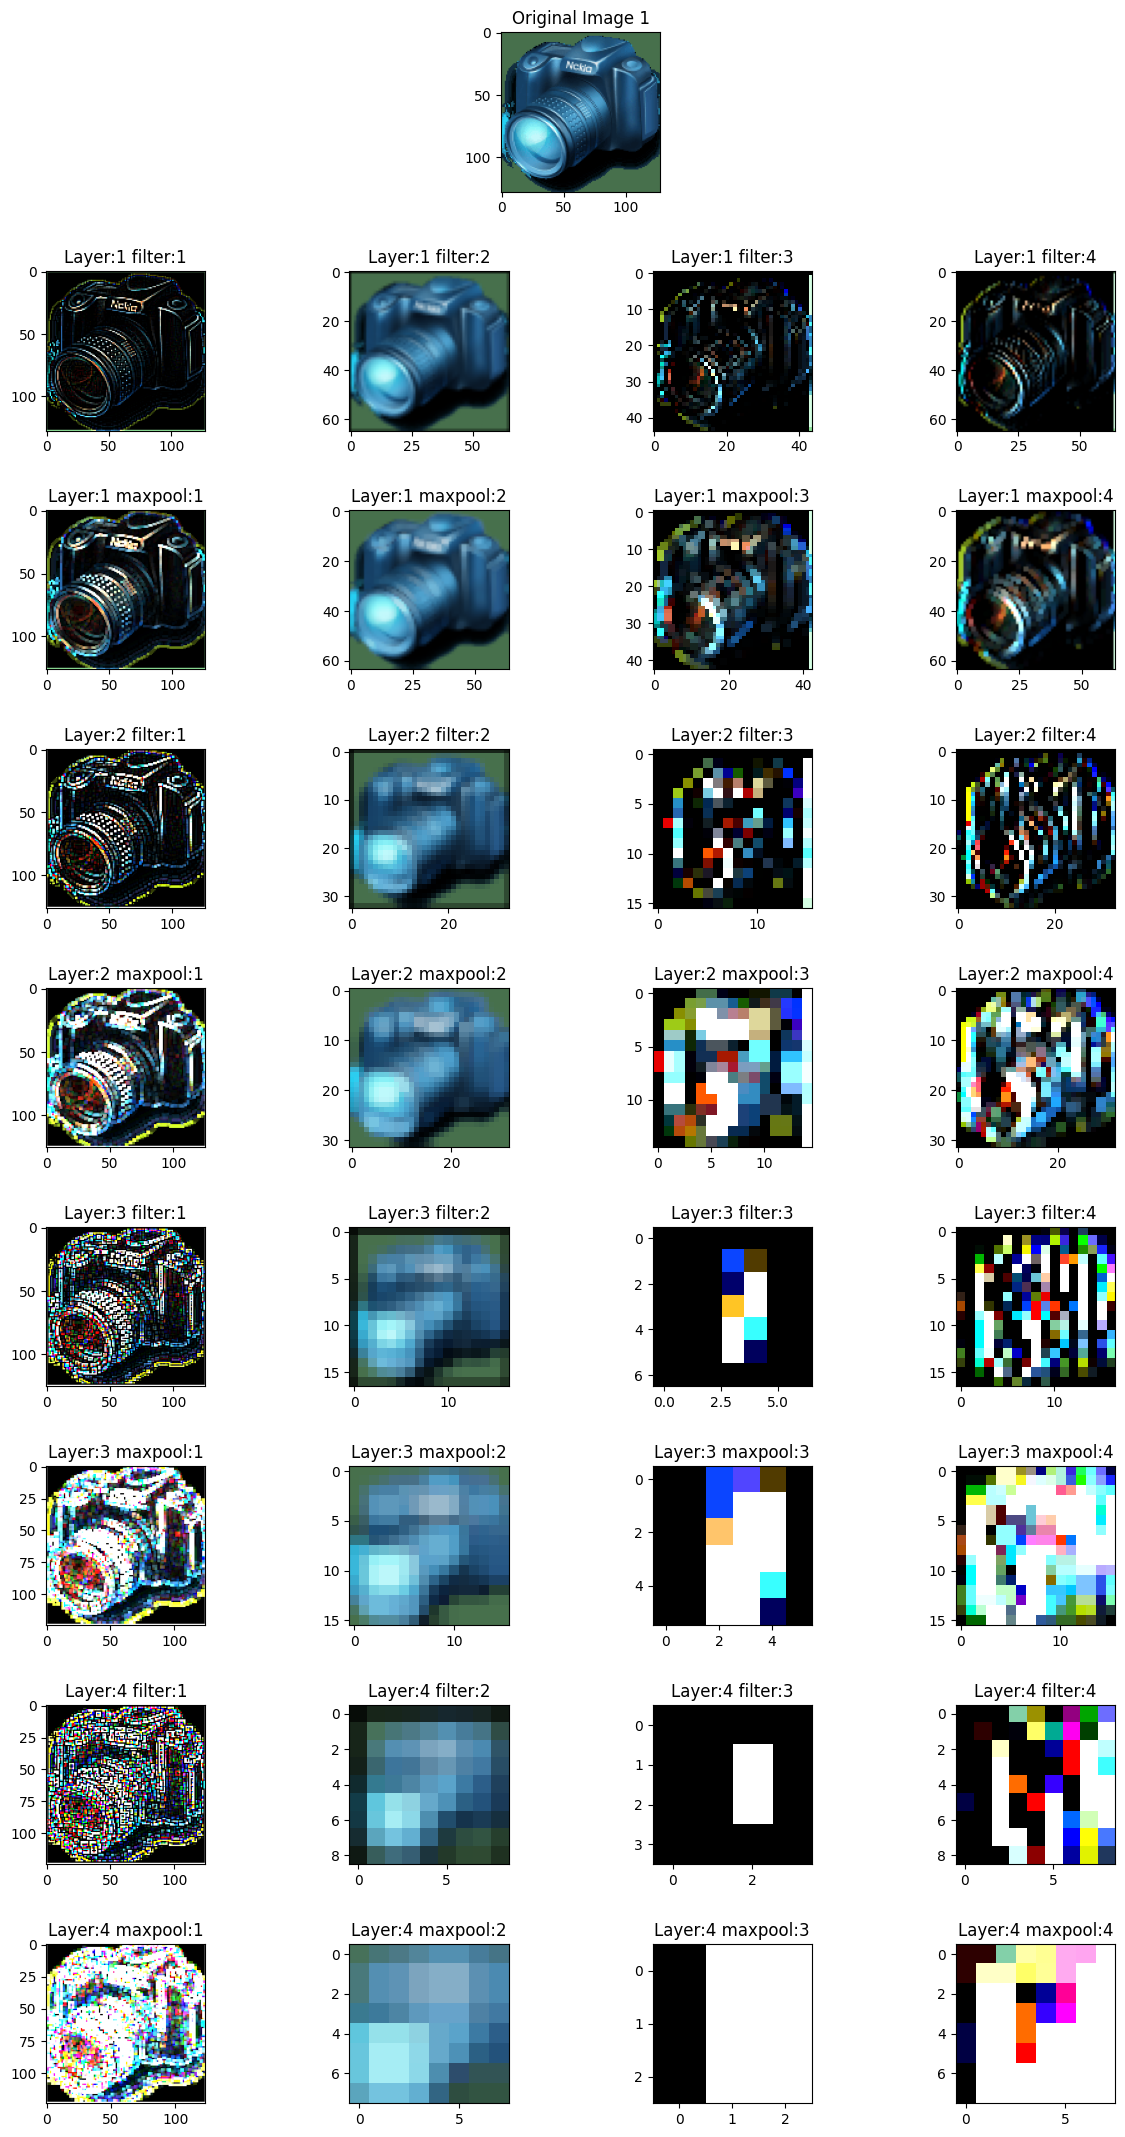

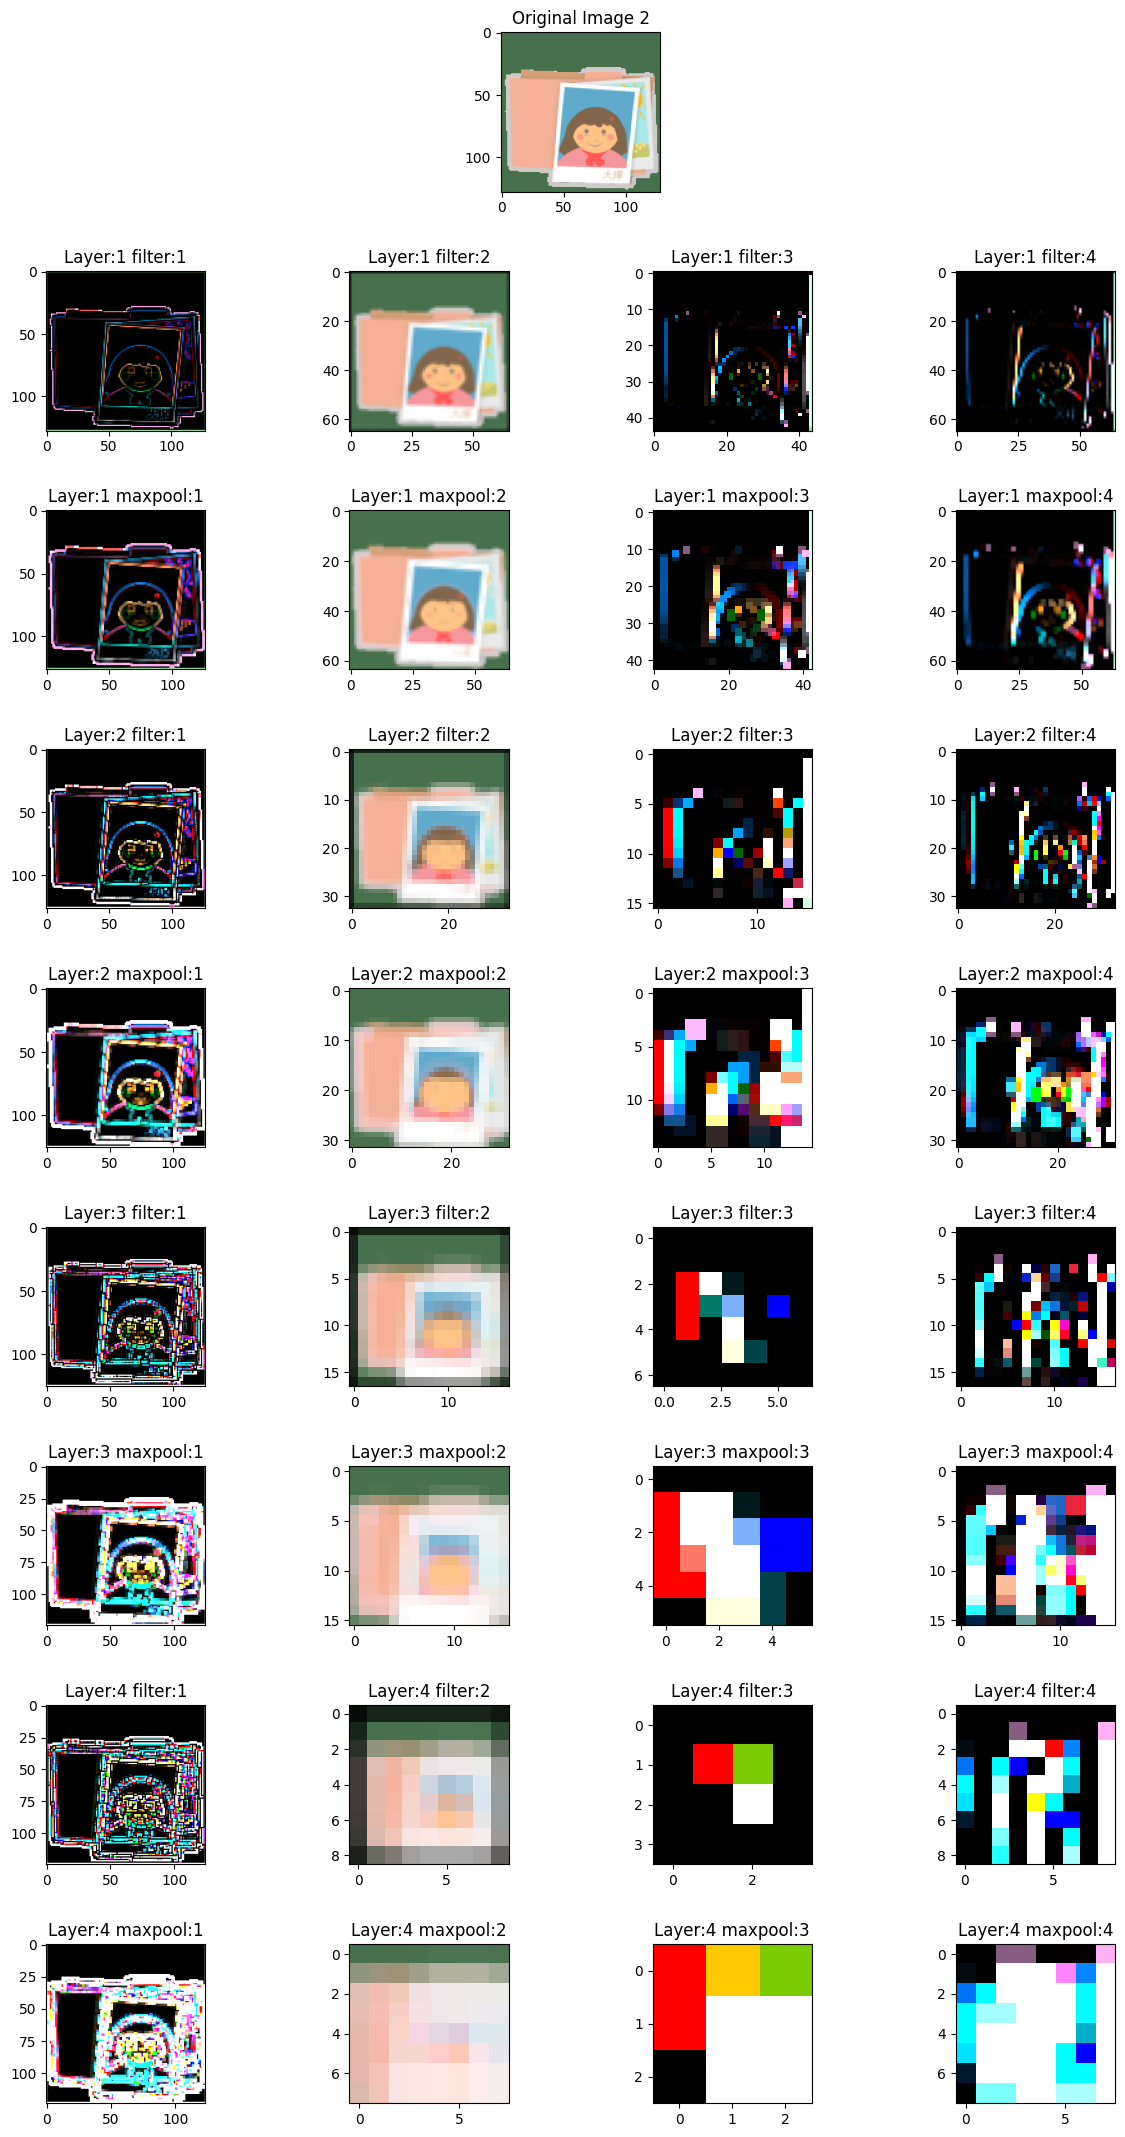

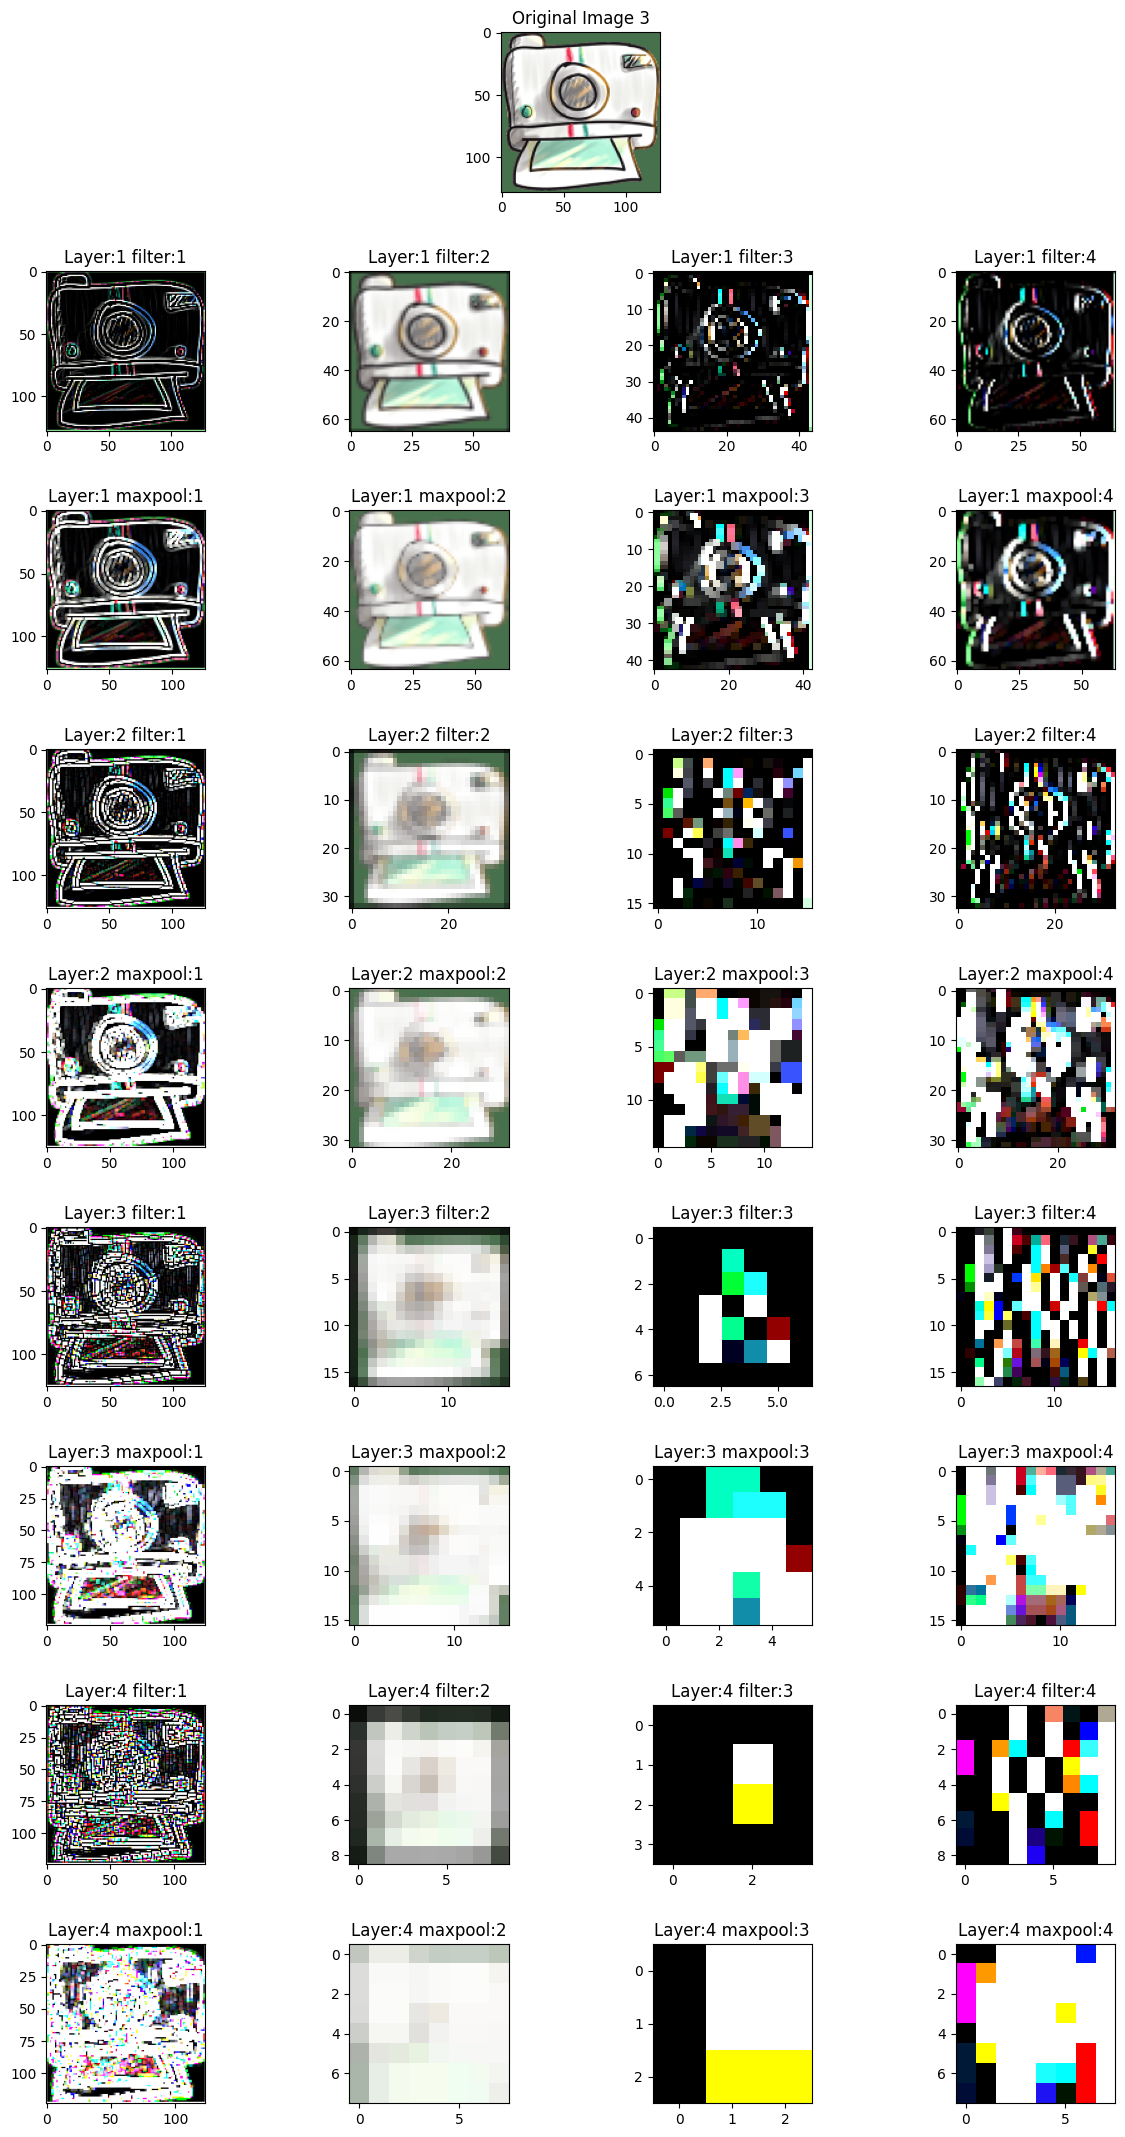

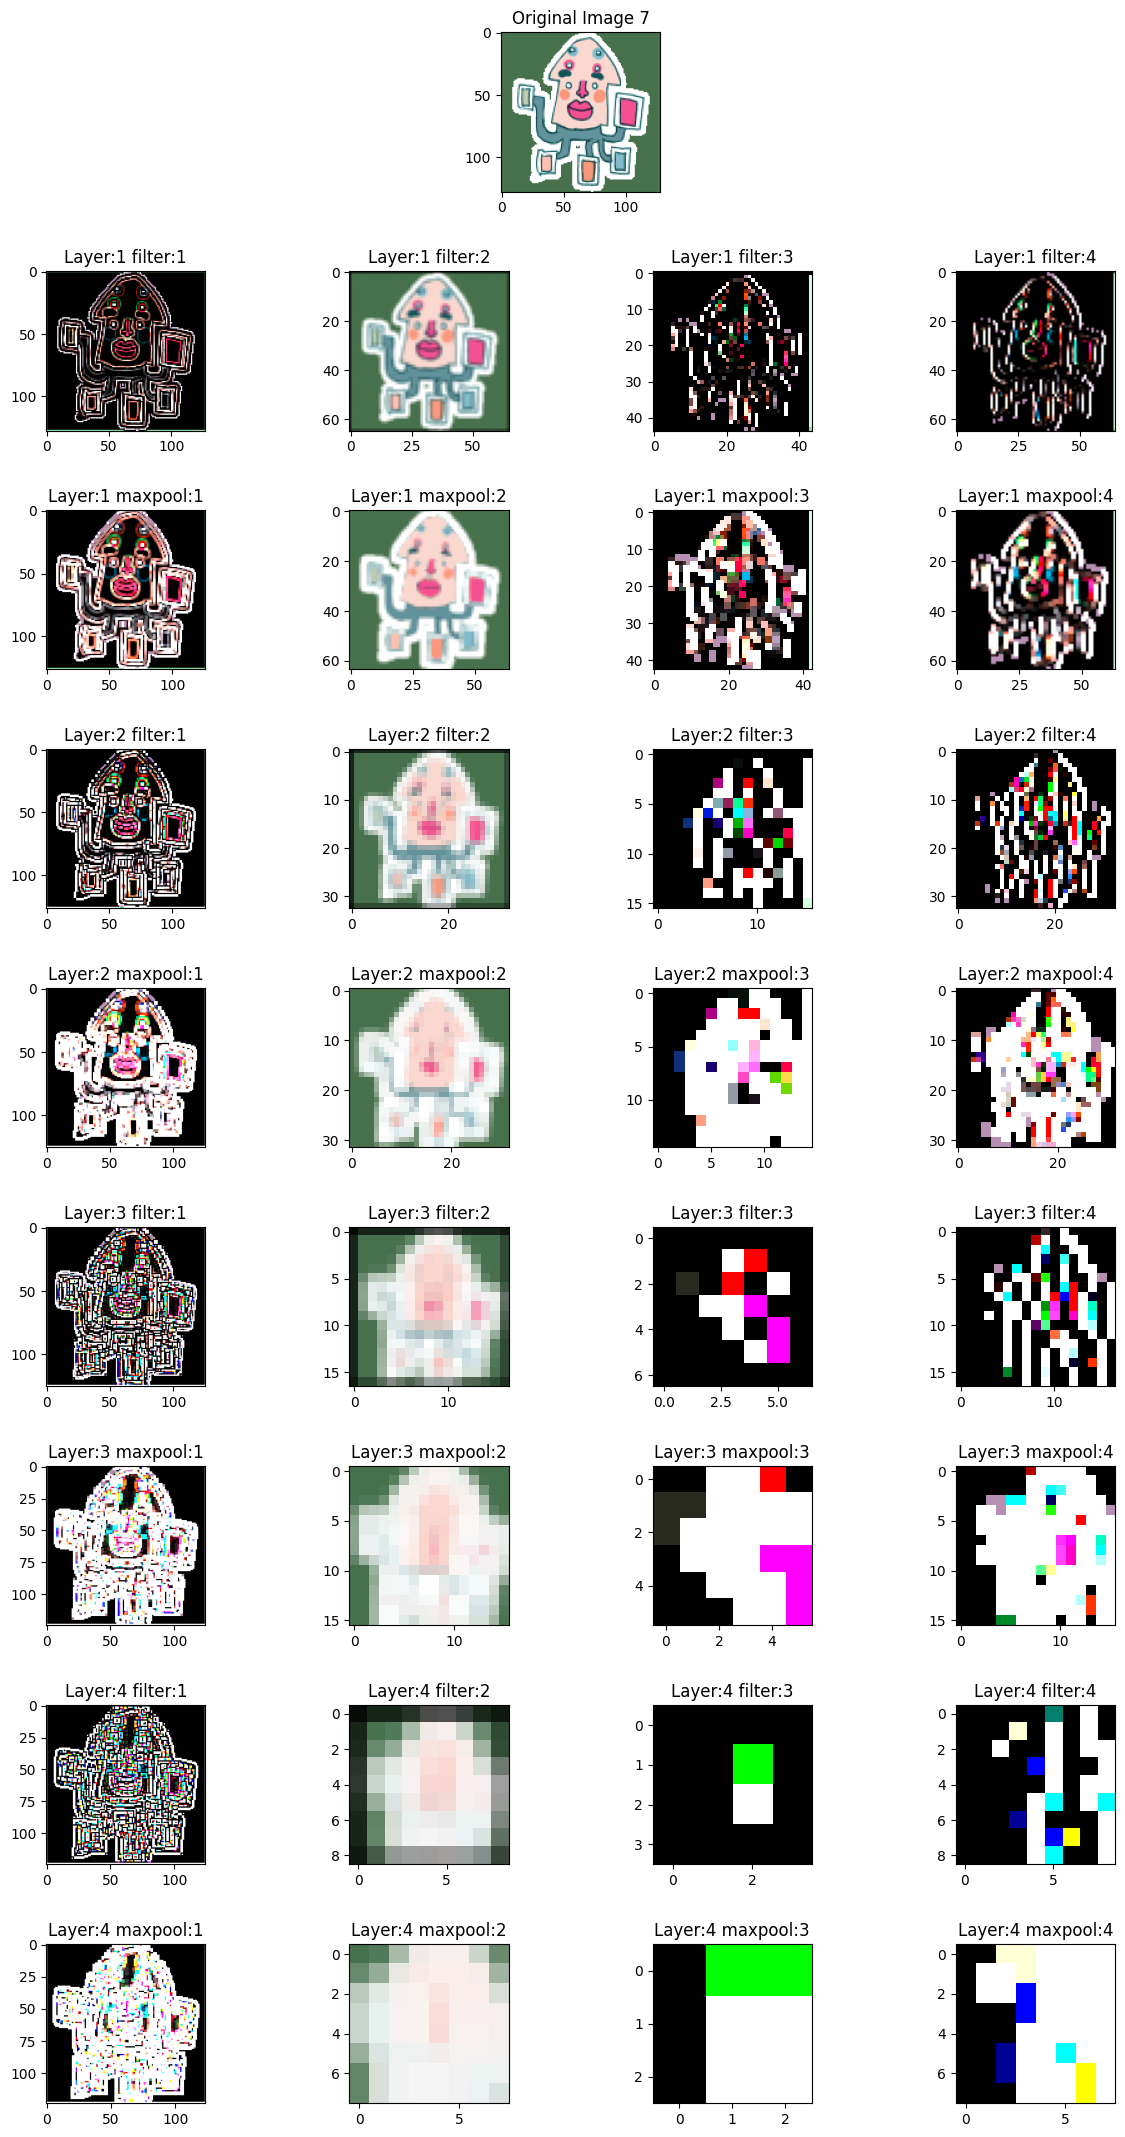

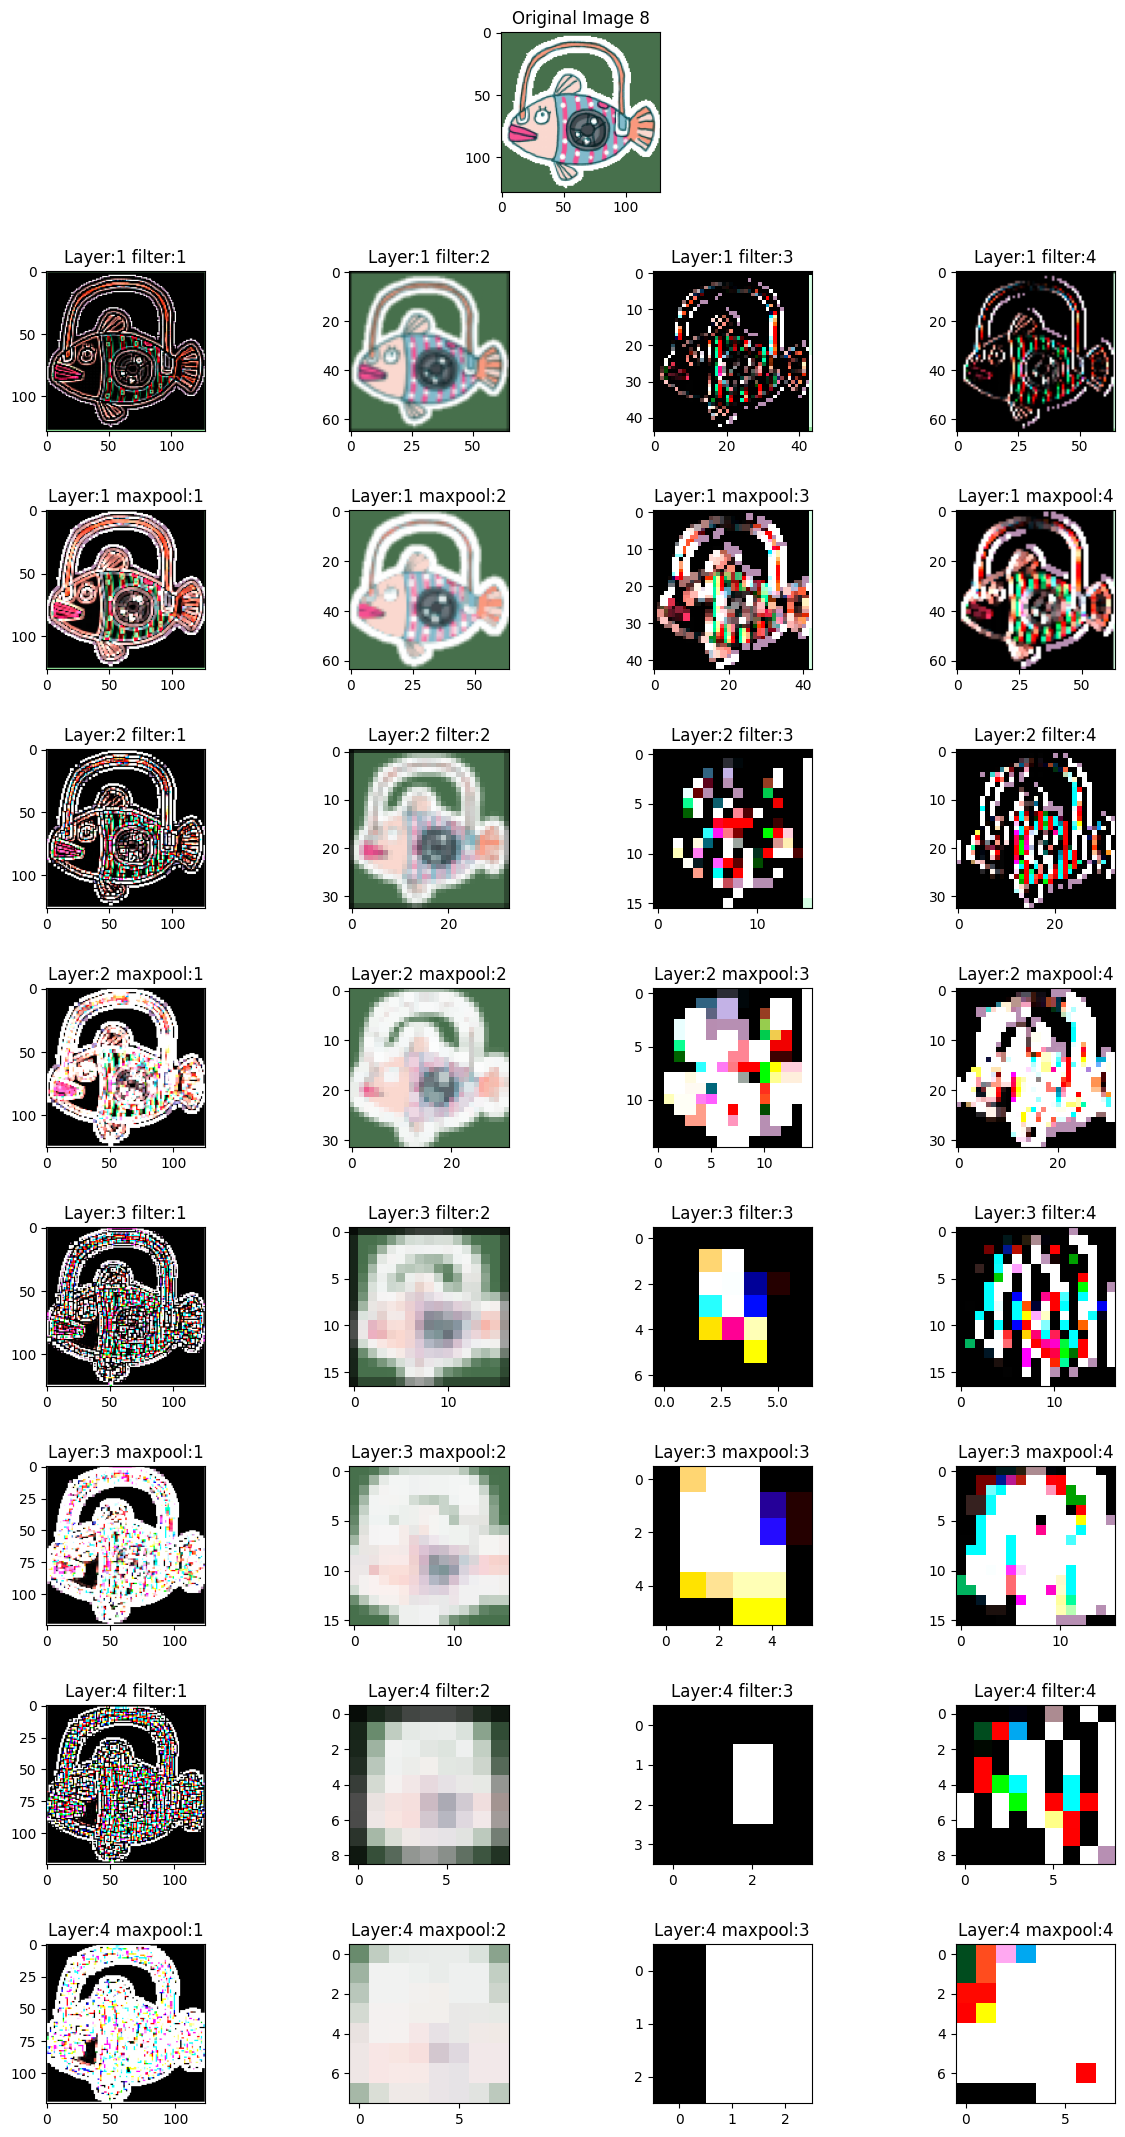

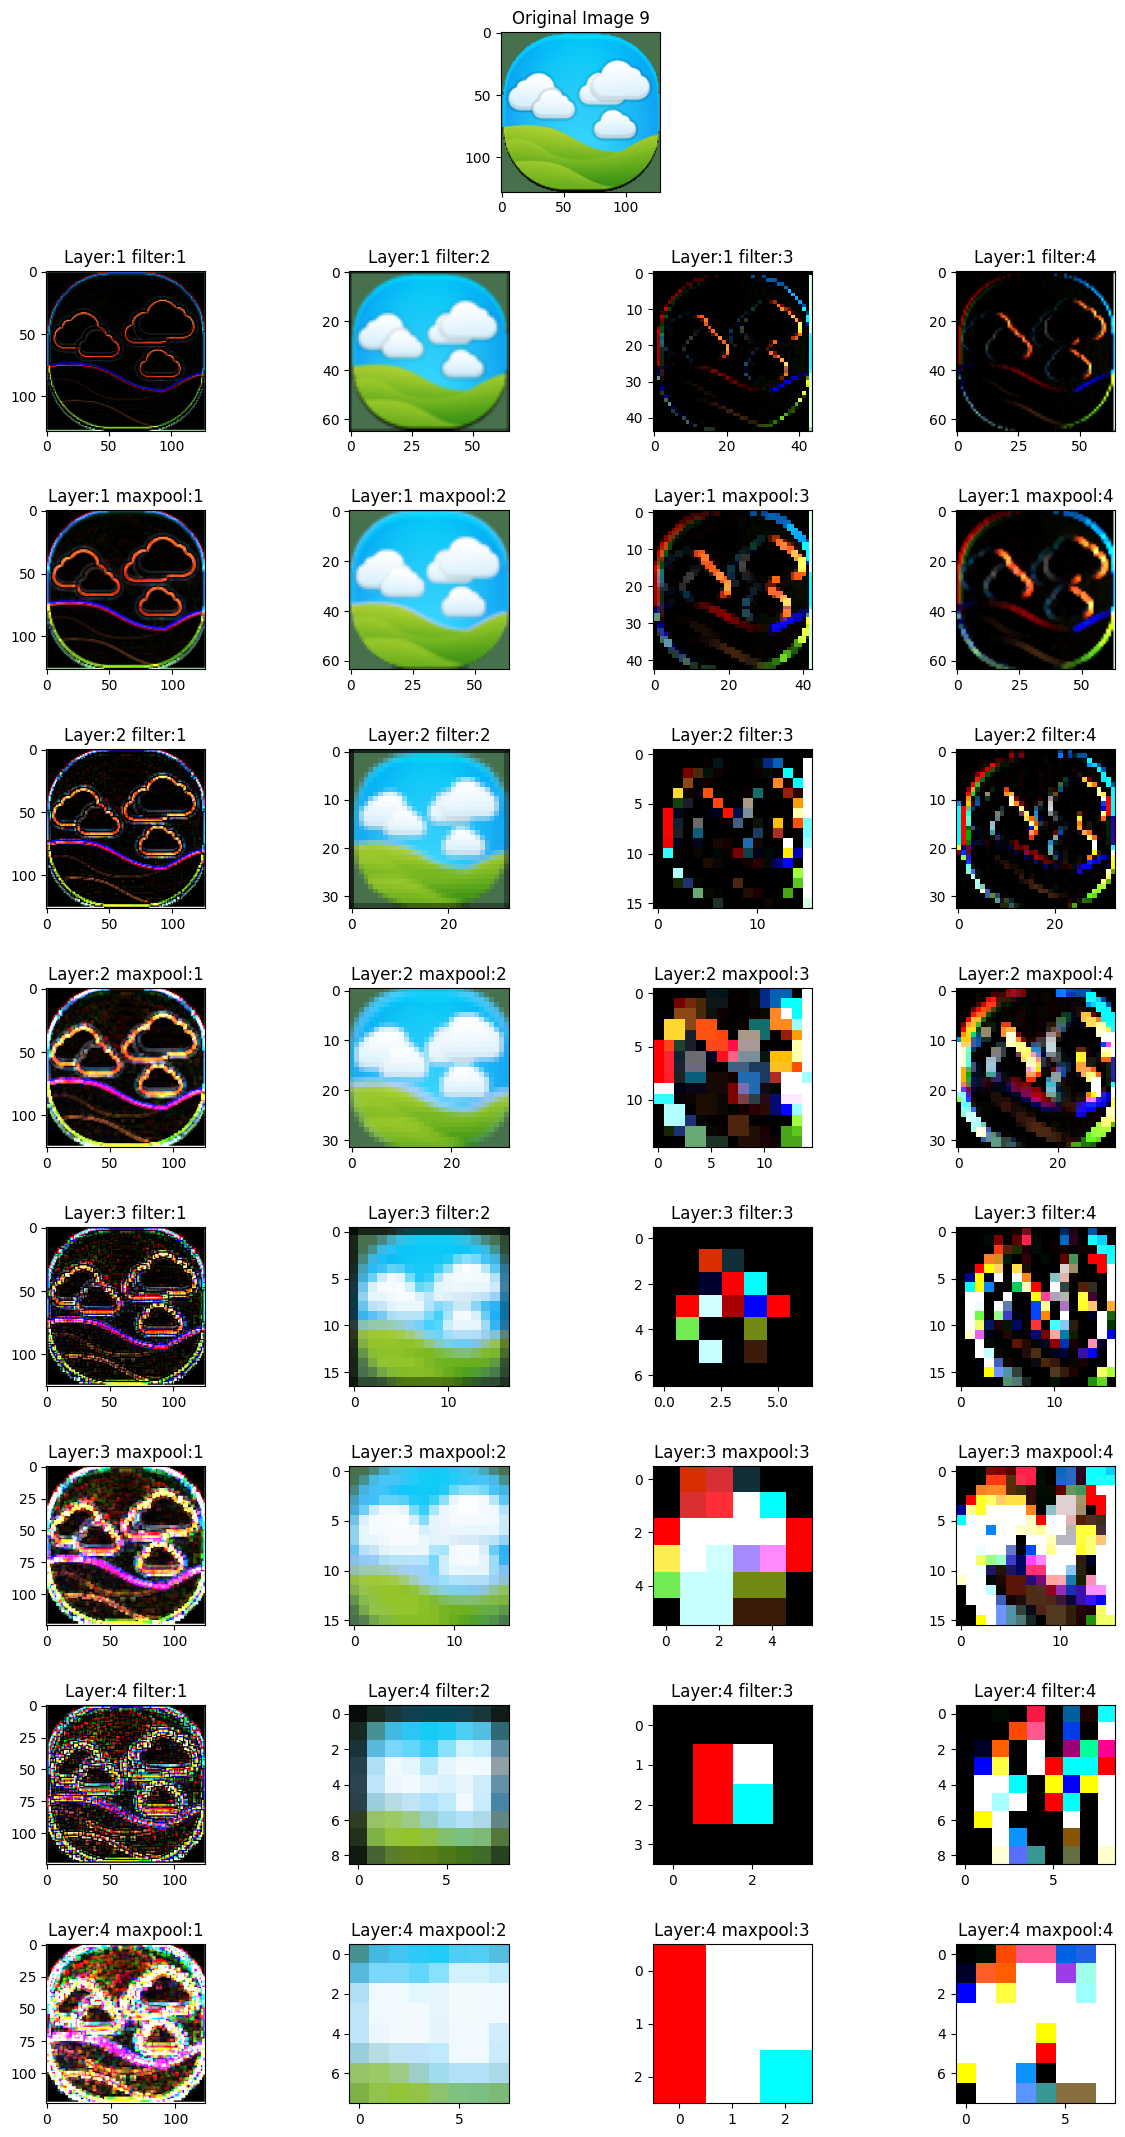

In [38]:
import matplotlib.gridspec as gridspec

for i in range(len(images)):
    n_layers = len(filtered_images)
    n_filters = len(filtered_images[0])
    fig = plt.figure(figsize=(15, 30)) 
    grid_rows = 2*n_filters + 2
    gs = gridspec.GridSpec(grid_rows, n_filters, height_ratios=[1 for x in range(grid_rows)], hspace=0.5)

    ax1 = plt.subplot(gs[0, :]) 
    ax1.set_title(f"Original Image {i+1}")
    ax1.imshow(images[i])

    for l in range(len(filtered_images)):
        for f in range(len(filtered_images[0])):

            ax2 = plt.subplot(gs[2*l+1, f]) 
            ax2.set_title(f"Layer:{l+1} filter:{f+1}")
            ax2.imshow(np.clip(filtered_images[l][f][i],0,1))
            
            ax3 = plt.subplot(gs[2*l+2, f]) 
            # ax3 = plt.subplot(gs[l+1, f]) 
            ax3.set_title(f"Layer:{l+1} maxpool:{f+1}")
            ax3.imshow(np.clip(maxout_images[l][f][i],0,1))
            
plt.show()